# KMeans clustering

## KMeans clustering in a toy dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# create a toy dataset
samples = np.array([
    [1,2],[2,2],[2,3],[2,4],[3,3],[3,4],
    [4,7],[5,5],[5,6],[5,7],[5,8],[6,6],[6,7],[7,6],
    [8,10],[9,8],[9,9],[9,10],[10,9],[10,10]
     ])

# print the samples
print(samples)

[[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 3  3]
 [ 3  4]
 [ 4  7]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 6  6]
 [ 6  7]
 [ 7  6]
 [ 8 10]
 [ 9  8]
 [ 9  9]
 [ 9 10]
 [10  9]
 [10 10]]


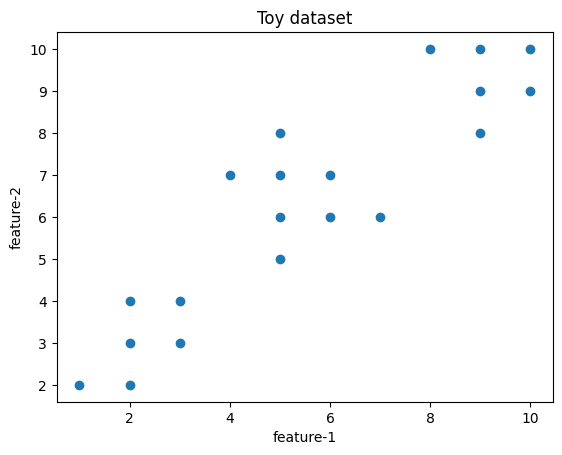

In [25]:
# divide the x-axis (feature 1) and y-axis (feature 2) columns
xs = samples[:,0]
ys = samples[:,1]

# scatter plot
plt.scatter(xs, ys)
plt.title("Toy dataset")
plt.xlabel("feature-1")
plt.ylabel("feature-2")
plt.show()

In [23]:
from sklearn.cluster import KMeans

# define the model hyperparameters
model = KMeans(n_clusters=3)

# train the model (replace <samples> with your data)
model.fit(samples)

# predict the labels (cluster number) from the same samples. Can also predict the label for new samples
labels = model.predict(samples)
print(labels)

[2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


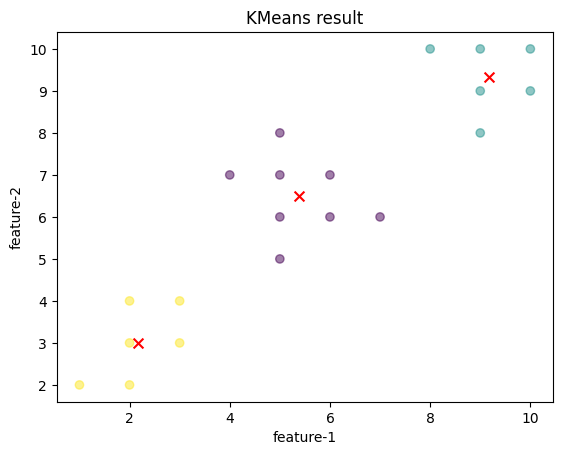

In [26]:
#scatter plot to see data points in color by cluster label
xs = samples[:,0] # choose the first feature column
ys = samples[:,1] # choose the third feature column
plt.scatter(xs, ys, c=labels, alpha=0.5, )

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='x', s=50, color='red')

plt.title("KMeans result")
plt.xlabel("feature-1")
plt.ylabel("feature-2")
plt.show()

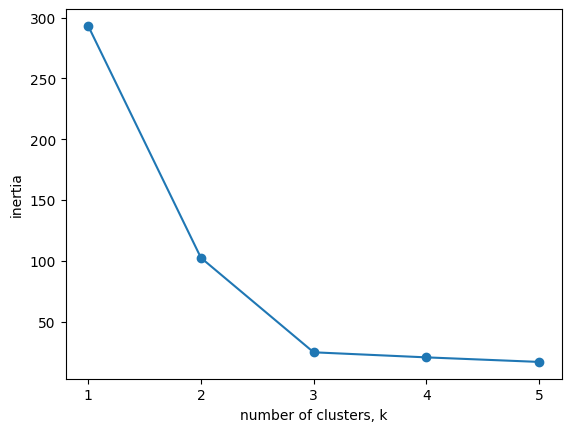

In [4]:
# Evaluationg the clustering

from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## KMeans in a real dataset (Piedmont wines dataset)

Source: https://archive.ics.uci.edu/ml/datasets/Wine

- 178 samples from 3 distinct varieties of red wine from the Piedmont region of Italy: Barolo, Grignolio and Barbera.
- The features measure the chemical composition (e.g., alcohol content), and visial properties (e.g., color intensity)

In [3]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()

#Convert to pandas dataframe
wine_df = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
from sklearn.cluster import KMeans

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Fit model to samples
kmeans.fit(wine_df)

# Calculate the cluster labels: labels
labels = kmeans.predict(wine_df)

labels

Python(36651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int32)

In [6]:
import pandas as pd

# Create a DataFrame with labels and target as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': wine_df['target']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  0.0  1.0  2.0
labels                  
0           13   20   29
1            0   50   19
2           46    1    0


Scaling data for clustering

In [9]:
# Perform the necessary imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

Clustering the data

In [10]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(wine_df)

# Calculate the cluster labels: labels
labels = pipeline.predict(wine_df)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': wine_df['target']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  0.0  1.0  2.0
labels                  
0            0   67    0
1            0    1   48
2           59    3    0
